In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from butterworth import butter_lowpass_filter

In [ ]:
#data = pd.read_csv('./goesciences/AbdullahA/well1.csv')
data = pd.read_csv('well1.csv')
data = data.dropna(how='any')

data['VELP'] = 1000000/data.DT
data = data[['DEPTH', 'RHOB', 'VELP', 'GR', 'FACIES']]

data['RHOBF'] = butter_lowpass_filter(data.RHOB.values, 10, 1000/1, order=5)
data['VELPF'] = butter_lowpass_filter(data.VELP.values, 10, 1000/1, order=5)
data['GRF'] = butter_lowpass_filter(data.GR.values, 10, 1000/1, order=5)
data = data[['DEPTH', 'RHOBF', 'VELPF', 'GRF', 'FACIES']]

In [ ]:
X_train = data.iloc[:,1:4].values

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train = data.iloc[:,-1].values

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

X_test = X_train
y_pred = model.predict(X_test)

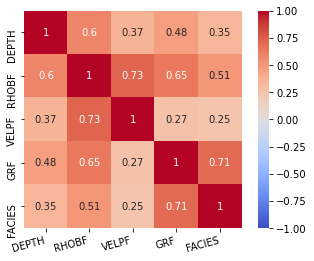

In [ ]:
# Confusion Matrix
cor_train = data.corr()
cor_test = data.corr()
ax = sns.heatmap(
    cor_train,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,annot = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=15,
    horizontalalignment='right')
plt.show()
#################

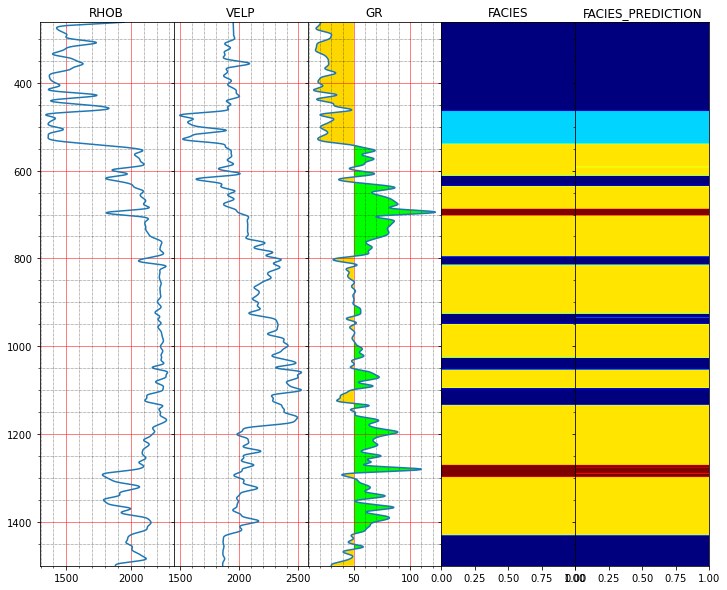

In [ ]:
data = data.values
rows, cols = 1, 5
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)
mnemonics = ['RHOB', 'VELP', 'GR', 'FACIES', 'FACIES_PREDICTION']

for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[:,i+1], data[:,0])
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].set_title('{}'.format(mnemonics[i]))
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='red')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    elif i == cols-2:
        F = np.vstack((data[:,-1], data[:,-1])).T
        ax[i].imshow(F, aspect='auto', cmap='jet', extent=[0,1, max(data[:,0]), min(data[:,0])])
        ax[i].set_title('{}'.format(mnemonics[i]))
    elif i == cols-1:
        F = np.vstack((y_pred, y_pred)).T
        ax[i].imshow(F, aspect='auto', cmap='jet', extent=[0,1, max(data[:,0]), min(data[:,0])])
        ax[i].set_title('{}'.format(mnemonics[i]))

y2 = data[:,3]
y1 = y2*0 + 50
ax[2].fill_betweenx(data[:,0], y1,y2, where=(y1>=y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:,0], y1,y2, where=(y1< y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()        